Nerdy Personality Attributes Scale (NPAS)
- 응답자의 성격이 nerd로 정의된 사람들의 평균과 비슷한지, 아니면 일반 사람들의 평균과 비슷한지 측정하는 테스트
- 26개 질문
- https://openpsychometrics.org/tests/NPAS/

### 칼럼 설명
- Q1~Q26: 질문
    - 대답: 1 ~ 5
- country: 응답자의 국적
- introelapse: intro에서 소요된 시간
- testelapse: test에서 소요된 시간
- surveyelapse: survey에서 소요된 시간
- TIPI1~TIPI10: 본인을 나타내는 단어 
    - 대답: 1(전혀 아니다) ~ 7(매우 그렇다)
- VCL1~VCL16: 지식 수준?, 정확한 의미를 아는 단어 체크 
    - 대답: 1(안다), 0 (모른다)
- education: 교육 수준
- urban: 거주 지역
- gender: 성별
- engnat: 영어가 모국어인지의 여부
- age: 나이
- hand: 왼손잡이 or 오른손잡이
- religion: 종교
- orientation: 지남력 (현재 자신이 놓여 있는 상황을 올바르게 인식하는 능력) https://www.amc.seoul.kr/asan/healthinfo/easymediterm/easyMediTermDetail.do?dictId=3798
- voted: 투표에 참여한 횟수
- married: 결혼한 횟수
- familisize: 가족 구성원 수
- ASD: 자폐스펙트럼장애 정도
- nerdiness: *타겟변수, nerdiness 정량화하는 프로젝트, nerd인지 아닌지
https://educalingo.com/ko/dic-en/nerdiness

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

index   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  ...  engnat  age  hand  \
0      0  1.0  5.0  5.0  5.0  1.0  4.0  5.0  5.0  1.0  ...     1.0   20   2.0   
1      1  4.0  4.0  4.0  4.0  4.0  5.0  4.0  4.0  3.0  ...     1.0   49   1.0   
2      2  4.0  5.0  5.0  4.0  3.0  5.0  5.0  5.0  4.0  ...     2.0   43   1.0   
3      3  4.0  4.0  4.0  2.0  4.0  3.0  3.0  5.0  3.0  ...     1.0   17   2.0   
4      4  4.0  4.0  4.0  4.0  3.0  3.0  4.0  2.0  3.0  ...     2.0   18   2.0   

   religion  orientation  voted  married  familysize  ASD  nerdiness  
0      12.0          4.0    2.0      1.0         4.0  2.0          1  
1       2.0          1.0    1.0      2.0         4.0  2.0          1  
2       2.0          2.0    2.0      3.0         4.0  2.0          1  
3       1.0          1.0    2.0      1.0         2.0  2.0          1  
4      12.0          1.0    2.0      1.0         1.0  2.0          0  

[5 rows x 70 columns]

In [4]:
test.head()

index   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  ...  gender  engnat  \
0      0  4.0  4.0  3.0  5.0  5.0  5.0  3.0  5.0  4.0  ...     2.0     2.0   
1      1  4.0  5.0  4.0  4.0  5.0  4.0  5.0  5.0  5.0  ...     1.0     1.0   
2      2  5.0  5.0  5.0  5.0  4.0  5.0  5.0  5.0  5.0  ...     2.0     2.0   
3      3  5.0  4.0  3.0  4.0  5.0  4.0  5.0  4.0  4.0  ...     1.0     1.0   
4      4  5.0  5.0  5.0  5.0  5.0  3.0  5.0  5.0  5.0  ...     2.0     2.0   

   age  hand  religion  orientation  voted  married  familysize  ASD  
0   19   1.0       4.0          4.0    1.0      1.0         3.0  2.0  
1   33   1.0       1.0          5.0    2.0      1.0         5.0  2.0  
2   13   1.0       4.0          5.0    2.0      1.0         3.0  2.0  
3   28   1.0       2.0          2.0    2.0      1.0         3.0  2.0  
4   15   1.0       4.0          5.0    2.0      1.0         2.0  2.0  

[5 rows x 69 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [6]:
train.isnull().sum()

index           0
Q1             41
Q2             69
Q3             50
Q4             71
             ... 
voted          85
married        82
familysize    319
ASD            89
nerdiness       0
Length: 70, dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35452 entries, 0 to 35451
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         35452 non-null  int64  
 1   Q1            35333 non-null  float64
 2   Q2            35305 non-null  float64
 3   Q3            35322 non-null  float64
 4   Q4            35327 non-null  float64
 5   Q5            35362 non-null  float64
 6   Q6            35320 non-null  float64
 7   Q7            35310 non-null  float64
 8   Q8            35344 non-null  float64
 9   Q9            35348 non-null  float64
 10  Q10           35232 non-null  float64
 11  Q11           35333 non-null  float64
 12  Q12           35303 non-null  float64
 13  Q13           35356 non-null  float64
 14  Q14           35350 non-null  float64
 15  Q15           35345 non-null  float64
 16  Q16           35367 non-null  float64
 17  Q17           35373 non-null  float64
 18  Q18           35305 non-nu

In [8]:
test.isnull().sum()

index            0
Q1             119
Q2             147
Q3             130
Q4             125
              ... 
orientation    823
voted          181
married        180
familysize     703
ASD            237
Length: 69, dtype: int64

In [9]:
x_train = train.copy()
x_train.drop('nerdiness', axis=1, inplace = True)
y_train = train['nerdiness']

In [10]:
len(x_train.index)

15000

In [11]:
len(y_train.index)

15000

In [12]:
dataset = [x_train, test]

## Q

In [13]:
Answers = []
for i in range(1,27):
    Answers.append('Q'+str(i))
print(Answers)
#Answers = train.iloc[:, 1:27]

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']


<AxesSubplot:>

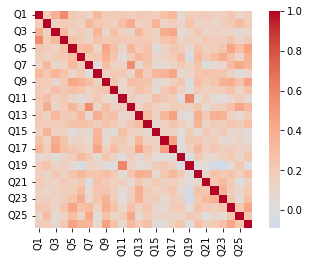

In [14]:
correlations = train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

양의 상관관계로 나와서 데이콘에서 바꿔놓은 것으로 간주

*   항목 추가
*   항목 추가


->부호 변경 하지 않음

In [15]:
#결측값 확인
x_train[Answers].isnull().sum()

Q1     41
Q2     69
Q3     50
Q4     71
Q5     38
Q6     48
Q7     76
Q8     48
Q9     56
Q10    72
Q11    59
Q12    67
Q13    40
Q14    36
Q15    45
Q16    33
Q17    37
Q18    63
Q19    53
Q20    45
Q21    39
Q22    38
Q23    50
Q24    61
Q25    44
Q26    68
dtype: int64

In [16]:
#결측값 확인
test[Answers].isnull().sum()

Q1     119
Q2     147
Q3     130
Q4     125
Q5      90
Q6     132
Q7     142
Q8     108
Q9     104
Q10    220
Q11    119
Q12    149
Q13     96
Q14    102
Q15    107
Q16     85
Q17     79
Q18    147
Q19     97
Q20    119
Q21    123
Q22     82
Q23    114
Q24    125
Q25    108
Q26    108
dtype: int64

In [17]:
#결측값 대체(평균 이용)
# train[Answers] = train[Answers].fillna(train[Answers].mean())
# test[Answers] = test[Answers].fillna(test[Answers].mean())
for data in dataset:
    data[Answers] = data[Answers].fillna(data[Answers].mean())

In [18]:
#다시 결측값 확인
x_train[Answers].isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
Q25    0
Q26    0
dtype: int64

In [19]:
test[Answers].isnull().sum()

Q1     0
Q2     0
Q3     0
Q4     0
Q5     0
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
Q11    0
Q12    0
Q13    0
Q14    0
Q15    0
Q16    0
Q17    0
Q18    0
Q19    0
Q20    0
Q21    0
Q22    0
Q23    0
Q24    0
Q25    0
Q26    0
dtype: int64

In [20]:
for data in dataset:
    data['Q_score'] = data[Answers].sum(axis=1)

In [21]:
data

index   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  ...  engnat  age  \
0          0  4.0  4.0  3.0  5.0  5.0  5.0  3.0  5.0  4.0  ...     2.0   19   
1          1  4.0  5.0  4.0  4.0  5.0  4.0  5.0  5.0  5.0  ...     1.0   33   
2          2  5.0  5.0  5.0  5.0  4.0  5.0  5.0  5.0  5.0  ...     2.0   13   
3          3  5.0  4.0  3.0  4.0  5.0  4.0  5.0  4.0  4.0  ...     1.0   28   
4          4  5.0  5.0  5.0  5.0  5.0  3.0  5.0  5.0  5.0  ...     2.0   15   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...  ...   
35447  35447  4.0  5.0  5.0  3.0  3.0  4.0  5.0  5.0  4.0  ...     2.0   16   
35448  35448  5.0  5.0  5.0  5.0  5.0  4.0  5.0  3.0  5.0  ...     1.0   16   
35449  35449  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...     1.0   31   
35450  35450  5.0  5.0  4.0  5.0  5.0  1.0  5.0  1.0  5.0  ...     1.0   19   
35451  35451  5.0  5.0  4.0  5.0  2.0  4.0  3.0  5.0  4.0  ...     1.0   14   

       hand  religion  orientation  voted  married  familysize  ASD  Q_score  
0       1.0       4.0          4.0    1.0      1.0         3.0  2.0    109.0  
1       1.0       1.0          5.0    2.0      1.0         5.0  2.0    112.0  
2       1.0       4.0          5.0    2.0      1.0         3.0  2.0    109.0  
3       1.0       2.0          2.0    2.0      1.0         3.0  2.0     98.0  
4       1.0       4.0          5.0    2.0      1.0         2.0  2.0    106.0  
...     ...       ...          ...    ...      ...         ...  ...      ...  
35447   3.0      10.0          4.0    2.0      1.0         3.0  2.0    108.0  
35448   3.0       2.0          5.0    2.0      1.0         2.0  2.0    115.0  
35449   1.0       1.0          5.0    1.0      1.0         2.0  2.0    119.0  
35450   1.0      12.0          1.0    2.0      1.0         NaN  2.0    104.0  
35451   2.0       NaN          2.0    2.0      1.0         1.0  2.0    104.0  

[35452 rows x 70 columns]

In [22]:
#질문별로 비율 계산하여 새로운 피처 생성
#Ancoms = list(combinations(Answers, 2))

#for data in dataset:
  #for a,b in Ancoms:
    #data['mach_%s_dv_%s'%(a,b)] = data[a]/data[b]



In [23]:
test

index   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  ...  engnat  age  \
0          0  4.0  4.0  3.0  5.0  5.0  5.0  3.0  5.0  4.0  ...     2.0   19   
1          1  4.0  5.0  4.0  4.0  5.0  4.0  5.0  5.0  5.0  ...     1.0   33   
2          2  5.0  5.0  5.0  5.0  4.0  5.0  5.0  5.0  5.0  ...     2.0   13   
3          3  5.0  4.0  3.0  4.0  5.0  4.0  5.0  4.0  4.0  ...     1.0   28   
4          4  5.0  5.0  5.0  5.0  5.0  3.0  5.0  5.0  5.0  ...     2.0   15   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...  ...   
35447  35447  4.0  5.0  5.0  3.0  3.0  4.0  5.0  5.0  4.0  ...     2.0   16   
35448  35448  5.0  5.0  5.0  5.0  5.0  4.0  5.0  3.0  5.0  ...     1.0   16   
35449  35449  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...     1.0   31   
35450  35450  5.0  5.0  4.0  5.0  5.0  1.0  5.0  1.0  5.0  ...     1.0   19   
35451  35451  5.0  5.0  4.0  5.0  2.0  4.0  3.0  5.0  4.0  ...     1.0   14   

       hand  religion  orientation  voted  married  familysize  ASD  Q_score  
0       1.0       4.0          4.0    1.0      1.0         3.0  2.0    109.0  
1       1.0       1.0          5.0    2.0      1.0         5.0  2.0    112.0  
2       1.0       4.0          5.0    2.0      1.0         3.0  2.0    109.0  
3       1.0       2.0          2.0    2.0      1.0         3.0  2.0     98.0  
4       1.0       4.0          5.0    2.0      1.0         2.0  2.0    106.0  
...     ...       ...          ...    ...      ...         ...  ...      ...  
35447   3.0      10.0          4.0    2.0      1.0         3.0  2.0    108.0  
35448   3.0       2.0          5.0    2.0      1.0         2.0  2.0    115.0  
35449   1.0       1.0          5.0    1.0      1.0         2.0  2.0    119.0  
35450   1.0      12.0          1.0    2.0      1.0         NaN  2.0    104.0  
35451   2.0       NaN          2.0    2.0      1.0         1.0  2.0    104.0  

[35452 rows x 70 columns]

In [24]:
#Tatic/ Morality/ View로 분류하여 새로운 피처 생성
for data in dataset:
    data['T'] = data['Q1']+data['Q2']+data['Q3']+data['Q7']+data['Q10']+data['Q12']+data['Q15']+data['Q16'] 
    data['V'] = data['Q4']+data['Q5']+data['Q8']+data['Q11']+data['Q13']+data['Q20']
    data['M'] = data['Q9']+data['Q19']

In [25]:
#분산 피처 생성
for data in dataset:
    data['Mach_var'] = data[Answers].var(axis = 1)

In [26]:
#기존 Q drop 
for data in dataset:
    data.drop([('Q'+str(i) )for i in range(1,27)], axis = 1, inplace = True)

In [27]:
dataset[0]

index country  introelapse  testelapse  surveyelapse  TIPI1  TIPI2  \
0          0     USA            3         553             6    4.0    3.0   
1          1     USA            5          85           120    4.0    2.0   
2          2     NLD            9         108           100    1.0    2.0   
3          3     USA            2         121           139    3.0    3.0   
4          4     ITA            3         640           216    3.0    3.0   
...      ...     ...          ...         ...           ...    ...    ...   
14995  14995     USA           12         103           161    2.0    2.0   
14996  14996     USA           31         106           179    3.0    2.0   
14997  14997     USA           17         103           168    1.0    3.0   
14998  14998     USA           14          68           109    1.0    1.0   
14999  14999     BRA            8         182           348    4.0    3.0   

       TIPI3  TIPI4  TIPI5  ...  orientation  voted  married  familysize  ASD  \
0        5.0    1.0    3.0  ...          4.0    2.0      1.0         4.0  2.0   
1        3.0    5.0    3.0  ...          1.0    1.0      2.0         4.0  2.0   
2        3.0    1.0    5.0  ...          2.0    2.0      3.0         4.0  2.0   
3        3.0    4.0    5.0  ...          1.0    2.0      1.0         2.0  2.0   
4        4.0    4.0    4.0  ...          1.0    2.0      1.0         1.0  2.0   
...      ...    ...    ...  ...          ...    ...      ...         ...  ...   
14995    4.0    3.0    3.0  ...          3.0    2.0      1.0         3.0  2.0   
14996    4.0    5.0    4.0  ...          1.0    1.0      2.0         3.0  2.0   
14997    2.0    5.0    1.0  ...          2.0    1.0      1.0         3.0  1.0   
14998    3.0    5.0    4.0  ...          4.0    2.0      2.0         2.0  1.0   
14999    3.0    3.0    4.0  ...          2.0    2.0      1.0         1.0  2.0   

       Q_score     T     V     M  Mach_var  
0         95.0  34.0  26.0   6.0  3.435385  
1         85.0  26.0  21.0   4.0  1.964615  
2         96.0  32.0  21.0   9.0  1.981538  
3         91.0  27.0  21.0   7.0  0.900000  
4         90.0  31.0  18.0   7.0  0.978462  
...        ...   ...   ...   ...       ...  
14995     87.0  31.0  19.0   5.0  1.355385  
14996    105.0  35.0  22.0   5.0  1.318462  
14997    120.0  39.0  29.0   8.0  0.566154  
14998    107.0  35.0  20.0  10.0  1.626154  
14999     89.0  30.0  19.0   9.0  0.893846  

[15000 rows x 48 columns]

In [28]:
dataset[1]

index country  introelapse  testelapse  surveyelapse  TIPI1  TIPI2  \
0          0     CHL            9         114           243    2.0    4.0   
1          1     USA           18         107           206    1.0    4.0   
2          2     IDN            4          87           191    3.0    3.0   
3          3     AUS         2409         155           258    1.0    4.0   
4          4     PHL           24         163           289    3.0    3.0   
...      ...     ...          ...         ...           ...    ...    ...   
35447  35447     USA           10         200           254    3.0    5.0   
35448  35448     GBR          504         136           155    3.0    3.0   
35449  35449     USA           27         121           191    1.0    5.0   
35450  35450     CAN            3          58           105    3.0    5.0   
35451  35451     GBR          158         269           178    1.0    5.0   

       TIPI3  TIPI4  TIPI5  ...  orientation  voted  married  familysize  ASD  \
0        3.0    4.0    3.0  ...          4.0    1.0      1.0         3.0  2.0   
1        3.0    5.0    4.0  ...          5.0    2.0      1.0         5.0  2.0   
2        4.0    3.0    4.0  ...          5.0    2.0      1.0         3.0  2.0   
3        3.0    3.0    4.0  ...          2.0    2.0      1.0         3.0  2.0   
4        3.0    5.0    5.0  ...          5.0    2.0      1.0         2.0  2.0   
...      ...    ...    ...  ...          ...    ...      ...         ...  ...   
35447    5.0    5.0    5.0  ...          4.0    2.0      1.0         3.0  2.0   
35448    5.0    5.0    3.0  ...          5.0    2.0      1.0         2.0  2.0   
35449    4.0    3.0    4.0  ...          5.0    1.0      1.0         2.0  2.0   
35450    5.0    1.0    5.0  ...          1.0    2.0      1.0         NaN  2.0   
35451    3.0    5.0    4.0  ...          2.0    2.0      1.0         1.0  2.0   

       Q_score     T     V     M  Mach_var  
0        109.0  30.0  26.0   8.0  0.721538  
1        112.0  34.0  28.0  10.0  0.781538  
2        109.0  36.0  23.0   7.0  1.521538  
3         98.0  32.0  24.0   9.0  1.384615  
4        106.0  38.0  26.0   6.0  1.753846  
...        ...   ...   ...   ...       ...  
35447    108.0  34.0  26.0   8.0  0.615385  
35448    115.0  35.0  28.0  10.0  0.973846  
35449    119.0  40.0  28.0  10.0  1.293846  
35450    104.0  31.0  21.0  10.0  2.880000  
35451    104.0  31.0  23.0   9.0  1.440000  

[35452 rows x 48 columns]

## country

- nerdiness와는 무관하다고 판단되어 drop함

In [29]:
pd.set_option('display.max_rows', None)

In [30]:
x_train['country'].value_counts()

USA    7419
GBR    1109
CAN     915
AUS     525
DEU     473
PHL     261
BRA     240
IND     233
POL     210
FRA     208
ITA     186
NLD     175
SWE     152
MEX     136
FIN     133
NZL     124
MYS     121
IDN     110
NOR     106
SGP     102
ESP      94
DNK      91
ROU      87
IRL      79
ARG      74
PRT      73
TUR      70
RUS      63
CZE      62
HUN      56
BEL      55
GRC      54
ZAF      52
CHL      49
AUT      48
CHE      47
ISR      44
SRB      38
HRV      35
JPN      32
HKG      31
THA      30
BGR      30
ARE      28
PAK      27
UKR      22
SVN      21
KOR      21
LTU      20
LVA      20
SVK      19
VEN      17
COL      16
PRI      15
KEN      15
PER      15
URY      14
CRI      14
SAU      12
EST      12
VNM      12
IRN      11
BIH      11
TWN      11
EGY      10
JOR      10
HND       9
KWT       9
ALB       8
NGA       8
CHN       8
ISL       8
QAT       8
JAM       7
TTO       7
DOM       6
MKD       5
BGD       5
BHS       4
BHR       4
GEO       4
GHA       4
GUM       4
ECU 

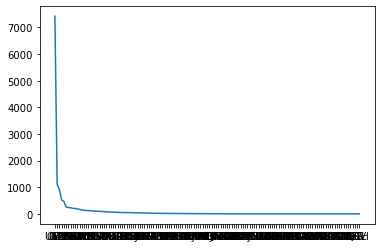

In [31]:
plt.plot(x_train['country'].value_counts())

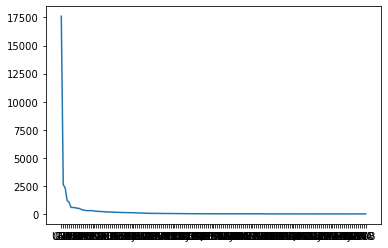

In [32]:
plt.plot(test['country'].value_counts())

In [33]:
x_train = x_train.drop(columns=['country'], axis = 1)
test = test.drop(columns = ['country'], axis = 1)

In [34]:
x_train.columns

Index(['index', 'introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2',
       'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',
       'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'voted', 'married', 'familysize', 'ASD', 'Q_score', 'T',
       'V', 'M', 'Mach_var'],
      dtype='object')

In [35]:
test.columns

Index(['index', 'introelapse', 'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2',
       'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9',
       'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16',
       'education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'voted', 'married', 'familysize', 'ASD', 'Q_score', 'T',
       'V', 'M', 'Mach_var'],
      dtype='object')

## elapse

In [36]:
elapse = ['introelapse', 'testelapse', 'surveyelapse']

<AxesSubplot:xlabel='introelapse', ylabel='count'>

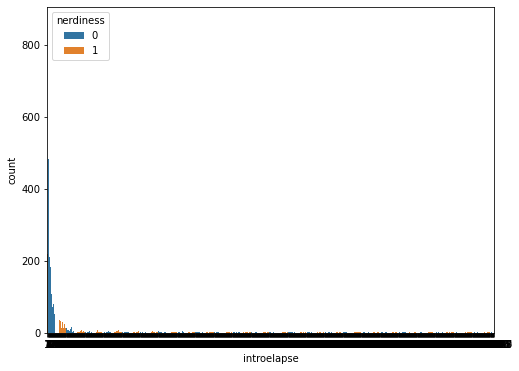

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='introelapse', hue = train['nerdiness'])

C:\Users\aeavy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aeavy\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='introelapse', ylabel='Density'>

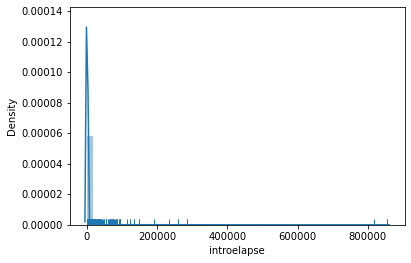

In [38]:
sns.distplot(train['introelapse'], rug=True)

<AxesSubplot:>

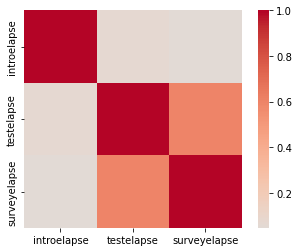

In [39]:
elapse_correlations = train[elapse].corr(method = 'spearman')
sns.heatmap(elapse_correlations, cmap="coolwarm", square=True, center=0)

intro는 test와 survey와 상관관계가 없다고 판단 

In [40]:
x_train[elapse]

introelapse  testelapse  surveyelapse
0                3         553             6
1                5          85           120
2                9         108           100
3                2         121           139
4                3         640           216
5                3         100           176
6               17          88           164
7               20          53           112
8                9         164           213
9              109         134           177
10              11          84           189
11              60         112           166
12               9          66            97
13               3         420           161
14               3         125           174
15               2         385           190
16               3          79           124
17              18          96           209
18               7         100           161
19               4         107           175
20               2         107           230
21              15         111           200
22              12          82           129
23               3         141           120
24               4         601           208
25              43         176           207
26              34         133           216
27               5          99           145
28             826          88           104
29               8          91           162
30               3         153           174
31              23         189           167
32              10         131           251
33               4          71           123
34               2          59            72
35            5558          64           280
36               5          96           158
37              11          89           167
38             317          86           165
39               5          70           152
40              45          69            94
41             637          81           125
42               9         130           217
43             410         123          1588
44               2         130           161
45              10          93           243
46             414         133           219
47               3          93           179
48               2         182           881
49              13         143           308
50              24         126           161
51              21         105           207
52              98          64            98
53               8         114           216
54             766         146           210
55              30         484           287
56            1972          68            98
57              10          97           210
58              13          73           120
59            1926          52            78
60               2         301           394
61               4          86           114
62               3          77           155
63               4          79           153
64               9         108           100
65              17          97           225
66               7         157           157
67              37         155           174
68               2         126           135
69              22         125           302
70               8         161           170
71              14         125           165
72              23         121           213
73              42         427           262
74              31         145           431
75              20          67           130
76              57          73           118
77               7          77            87
78               9          87           103
79              25         425           218
80               8         155           170
81              10         116           191
82               4         103           124
83              74         100           194
84               4         200           208
85             425         124           234
86              14          94           166
87              51         457           339
88

In [41]:
#걸린시간 합
x_train['elapse_sum'] = x_train['testelapse']+x_train['surveyelapse']
test['elapse_sum'] = test['testelapse']+test['surveyelapse']

In [42]:
#비율도 만들어보기..
x_train['test_dv_survey']=x_train['testelapse']/x_train['surveyelapse'] 
test['test_dv_survey']=test['testelapse']/test['surveyelapse'] 


In [43]:
x_train.head()

index  introelapse  testelapse  surveyelapse  TIPI1  TIPI2  TIPI3  TIPI4  \
0      0            3         553             6    4.0    3.0    5.0    1.0   
1      1            5          85           120    4.0    2.0    3.0    5.0   
2      2            9         108           100    1.0    2.0    3.0    1.0   
3      3            2         121           139    3.0    3.0    3.0    4.0   
4      4            3         640           216    3.0    3.0    4.0    4.0   

   TIPI5  TIPI6  ...  married  familysize  ASD  Q_score     T     V    M  \
0    3.0    5.0  ...      1.0         4.0  2.0     95.0  34.0  26.0  6.0   
1    3.0    2.0  ...      2.0         4.0  2.0     85.0  26.0  21.0  4.0   
2    5.0    5.0  ...      3.0         4.0  2.0     96.0  32.0  21.0  9.0   
3    5.0    3.0  ...      1.0         2.0  2.0     91.0  27.0  21.0  7.0   
4    4.0    4.0  ...      1.0         1.0  2.0     90.0  31.0  18.0  7.0   

   Mach_var  elapse_sum  test_dv_survey  
0  3.435385         559       92.166667  
1  1.964615         205        0.708333  
2  1.981538         208        1.080000  
3  0.900000         260        0.870504  
4  0.978462         856        2.962963  

[5 rows x 49 columns]

In [44]:
test.head()

index  introelapse  testelapse  surveyelapse  TIPI1  TIPI2  TIPI3  TIPI4  \
0      0            9         114           243    2.0    4.0    3.0    4.0   
1      1           18         107           206    1.0    4.0    3.0    5.0   
2      2            4          87           191    3.0    3.0    4.0    3.0   
3      3         2409         155           258    1.0    4.0    3.0    3.0   
4      4           24         163           289    3.0    3.0    3.0    5.0   

   TIPI5  TIPI6  ...  married  familysize  ASD  Q_score     T     V     M  \
0    3.0    4.0  ...      1.0         3.0  2.0    109.0  30.0  26.0   8.0   
1    4.0    5.0  ...      1.0         5.0  2.0    112.0  34.0  28.0  10.0   
2    4.0    4.0  ...      1.0         3.0  2.0    109.0  36.0  23.0   7.0   
3    4.0    4.0  ...      1.0         3.0  2.0     98.0  32.0  24.0   9.0   
4    5.0    4.0  ...      1.0         2.0  2.0    106.0  38.0  26.0   6.0   

   Mach_var  elapse_sum  test_dv_survey  
0  0.721538         357        0.469136  
1  0.781538         313        0.519417  
2  1.521538         278        0.455497  
3  1.384615         413        0.600775  
4  1.753846         452        0.564014  

[5 rows x 49 columns]

## TIPI

##### The TIPI items were rated "I see myself as:" _____ such that

- TIPI1	Extraverted, enthusiastic. :외향적, 열정적
- TIPI2	Critical, quarrelsome. :비판적, 시비걸기
- TIPI3	Dependable, self-disciplined. :신뢰할 수 있는, 자신의 규칙이 있는
- TIPI4	Anxious, easily upset. :불안한, 쉽게 우울한
- TIPI5	Open to new experiences, complex. :새 경험, 복잡성에 대한 열려있는
- TIPI6	Reserved, quiet. :말수가 적고 조용한
- TIPI7	Sympathetic, warm. :동정심 많은, 따뜻한
- TIPI8	Disorganized, careless. :무질서한, 부주의한
- TIPI9	Calm, emotionally stable. :침착한, 정서적으로 안정된
- TIPI10	Conventional, uncreative. :틀에 박힌, 창의적이지 않은

<AxesSubplot:>

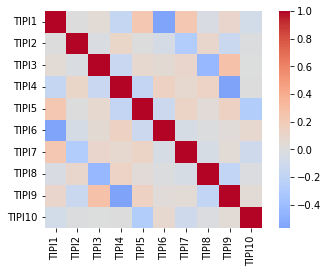

In [45]:
TIPI = []
for i in range(1,11):
    TIPI.append('TIPI'+str(i))

TIPI_correlations = train[TIPI].corr(method = 'spearman')
sns.heatmap(TIPI_correlations, cmap="coolwarm", square=True, center=0)

(1) TIPI 결측치 평균으로 대체

In [46]:
for data in dataset:
    data[TIPI] = data[TIPI].fillna(data[TIPI].mean())

In [47]:
for data in dataset:
    count=data[TIPI].isnull().sum()
    print(count)

TIPI1     0
TIPI2     0
TIPI3     0
TIPI4     0
TIPI5     0
TIPI6     0
TIPI7     0
TIPI8     0
TIPI9     0
TIPI10    0
dtype: int64
TIPI1     0
TIPI2     0
TIPI3     0
TIPI4     0
TIPI5     0
TIPI6     0
TIPI7     0
TIPI8     0
TIPI9     0
TIPI10    0
dtype: int64


In [48]:
x_train['TIPI1'].isnull().sum()

53

In [49]:
x_train[TIPI] = x_train[TIPI].fillna(x_train[TIPI].mean())
test[TIPI] = test[TIPI].fillna(test[TIPI].mean())

In [50]:
x_train['TIPI3'].isnull().sum()

0

(2) 반대되는 성격 묶기
- TIPI1 - TIPI6
- TIPI2 - TIPI7
- TIPI3 - TIPI8
- TIPI4 - TIPI9
- TIPI5 - TIPI10

In [51]:
x_train['Extraverted'] = x_train['TIPI1'] - x_train['TIPI6']
x_train['Warm'] = x_train['TIPI7']-x_train['TIPI2']
x_train['Dependable'] = x_train['TIPI3']-x_train['TIPI8']
x_train['Calm'] = x_train['TIPI9']-x_train['TIPI4']
x_train['OpenMind'] = x_train['TIPI5']-x_train['TIPI10']

In [52]:
test['Extraverted'] = test['TIPI1'] - test['TIPI1']
test['Warm'] = test['TIPI7']-test['TIPI2']
test['Dependable'] = test['TIPI3']-test['TIPI8']
test['Calm'] = test['TIPI9']-test['TIPI4']
test['OpenMind'] = test['TIPI5']-test['TIPI10']

In [53]:
x_train['Extraverted']

0       -1.000000
1        2.000000
2       -4.000000
3        0.000000
4       -1.000000
5        3.000000
6        0.000000
7        0.000000
8        0.000000
9       -2.000000
10      -1.000000
11       1.000000
12       2.000000
13       0.000000
14      -3.000000
15      -3.000000
16      -3.000000
17      -2.000000
18      -1.000000
19      -2.000000
20       0.000000
21       0.000000
22      -4.000000
23      -2.000000
24      -2.000000
25       0.000000
26      -3.000000
27      -4.000000
28      -1.000000
29       2.000000
30       2.000000
31      -3.000000
32      -4.000000
33      -1.000000
34       0.000000
35      -1.000000
36       0.000000
37      -4.000000
38      -2.000000
39      -2.000000
40       1.000000
41       2.000000
42      -2.000000
43       2.000000
44       0.000000
45       0.000000
46      -2.000000
47      -2.000000
48       0.000000
49      -4.000000
50       1.000000
51      -3.000000
52      -4.000000
53      -2.000000
54       1.000000
55      -3

In [54]:
x_train['Extraverted'].isnull().sum()

0

In [55]:
# #비율 만들기
# from itertools import combinations

# tps = ['TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
# tpcomns = list(combinations(tps,2))

# for a,b in tpcomns:
#   x_train['TP_%s_dv_%s'%(a,b)] = x_train[a]/x_train[b]

# for a,b in tpcomns:
#   test['TP_%s_dv_%s'%(a,b)] = test[a]/test[b]


In [56]:
# #비율 만들었으니 기존 TIPI drop

x_train.drop([('TIPI'+str(i)) for i in range(1,10)], axis=1, inplace = True)
x_train.drop('TIPI10', axis = 1, inplace = True)


test.drop([('TIPI'+str(i)) for i in range(1,10)], axis=1, inplace = True)
test.drop('TIPI10', axis = 1, inplace = True)


## VCL

In [57]:
VCL = []
for i in range(1,17):
    VCL.append('VCL'+str(i))
print(VCL)

['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16']


In [58]:
x_train['VCL_score'] = x_train[VCL].sum(axis=1)
test['VCL_score'] = test[VCL].sum(axis=1)

<AxesSubplot:xlabel='VCL_score', ylabel='count'>

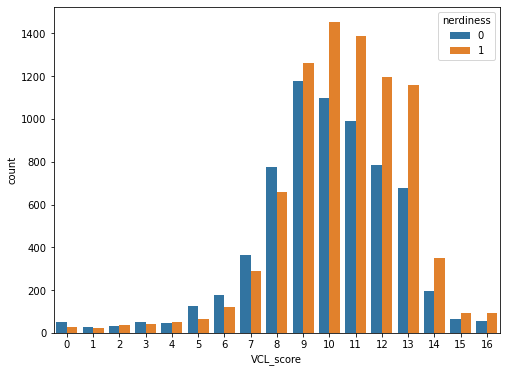

In [59]:
plt.figure(figsize=(8,6))
sns.countplot(data=x_train, x='VCL_score', hue = train['nerdiness'])

유의미한 피처라고 판단하여 score만 사용하고 기존 VCL은 drop

In [60]:
#기존 VCL drop 
x_train.drop([('VCL'+str(i) )for i in range(1,17)], axis = 1, inplace = True)
test.drop([('VCL'+str(i) )for i in range(1,17)], axis = 1, inplace = True)

In [61]:
# vcl6, vcl9, vcl12

In [62]:
nerd = y_train[y_train == 1].index

In [63]:
no_nerd = y_train[y_train == 0].index

## education

In [67]:
#교육수준, 결측치는 0으로 무응답 처리
x_train['education'] = x_train['education'].fillna(0)
test['education'] = test['education'].fillna(0)

In [68]:
# plot_dict = train.loc[:,'education'].value_counts().to_dict()
# x_values = sorted(plot_dict.keys())
# y_values = [plot_dict[x] for x in x_values]
# x_names = ['None','1','2','3','4']
# plt.bar(x_names,y_values)
# plt.tight_layout()
# plt.show()

In [69]:
# #education별로 nerdiness 평균 구함
# mean_df = train.groupby('education')['nerdiness'].agg('mean')
# display(mean_df)
# train['education'] = train['education'].map(mean_df)
# test['education'] = test['education'].map(mean_df)

- 교육수준이 None인 경우, 약 0.568이 nerdiness
- 1인 경우, 약 0.591이 nerdiness
- 2인 경우, 약 0.543이 nerdiness
- 3인 경우, 약 0.550이 nerdiness
- 4인 경우, 약 0.533이 nerdiness

## urban

In [70]:
# plt.figure(figsize = (8,6))
# sns.countplot(data=train, x='urban', hue = train['nerdiness'])

## Gender

In [71]:
# plt.figure(figsize = (8,6))
# sns.countplot(data = train, x = 'gender', hue = train['nerdiness'])

3은 무응답으로 추정

->추후 대체 고려

In [72]:
x_train['gender'].isnull().sum()

19

In [73]:
x_train['gender'] = x_train['gender'].fillna(x_train['gender'].max())
test['gender'] = test['gender'].fillna(test['gender'].max())

In [74]:
x_train['gender'].isnull().sum()

0

## engnat

In [75]:
# plt.figure(figsize = (8,6))
# sns.countplot(data=train, x='engnat', hue = train['nerdiness'])

In [76]:
# # 결측치 확인
# train['engnat'].isnull().sum()

In [77]:
#결측치 대체
x_train['engnat'] = x_train['engnat'].fillna(x_train['engnat'].mean())
test['engnat'] = test['engnat'].fillna(test['engnat'].mean())


In [78]:
# 결측치 확인
# train['engnat'].isnull().sum()

## age

<AxesSubplot:xlabel='age', ylabel='count'>

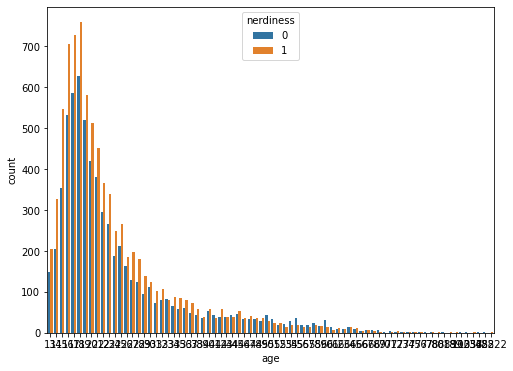

In [79]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='age', hue = train['nerdiness'])

In [80]:
age_counts = train['age'].value_counts()

age_counts

18       1386
17       1313
16       1239
19       1101
20        932
15        899
21        833
22        663
23        605
14        533
25        478
24        437
13        353
26        349
27        325
28        306
30        236
29        233
32        186
31        177
33        161
34        153
35        142
36        141
37        121
40        110
38        101
45         99
42         96
44         83
41         80
43         77
39         75
47         75
50         73
48         69
46         69
49         64
51         58
55         57
54         47
60         46
52         45
58         43
53         37
56         33
59         33
57         33
64         29
62         22
65         21
61         20
63         19
67         15
68         12
66         10
69          8
72          6
71          5
75          3
74          3
78          3
73          3
123         2
76          2
70          2
545         1
88          1
722         1
38822       1
100         1
77    

C:\Users\aeavy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aeavy\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\aeavy\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\aeavy\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='age'>

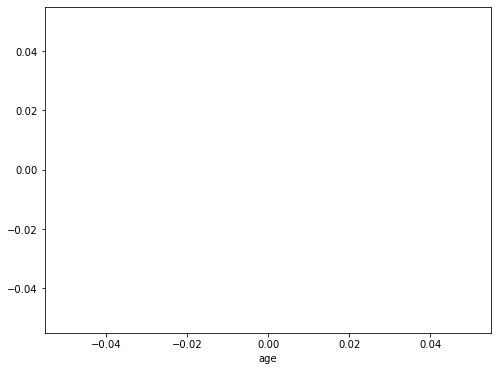

In [81]:
plt.figure(figsize = (8,6))
sns.distplot(x_train['age'][nerd] / x_train['age'][no_nerd])

In [82]:
x_train['age'][nerd]

0           20
1           49
2           43
3           17
5           26
6           40
7           34
13          24
17          18
20          16
21          16
22          17
24          15
26          40
28          18
30          17
33          17
34          32
38          17
39          25
40          27
41          33
43          18
45          27
46          18
48          13
49          22
50          19
51          17
52          23
54          21
55          25
59          19
60          13
61          14
62          26
63          64
64          43
65          17
66          44
69          31
72          35
73          16
74          15
75          14
77          22
78          16
82          16
83          67
85          21
86          15
87          16
88          48
92          18
94          14
101         17
103         20
104         46
106         18
108         27
109         34
110         48
111         18
113         27
117         14
118         24
120       

In [83]:
age_counts.tail(10)

545      1
88       1
722      1
38822    1
100      1
77       1
99       1
81       1
336      1
80       1
Name: age, dtype: int64

336살 이상치 확인

-> 이상치 제거

In [84]:
#이상치 제거
#x_train = x_train.drop(x_train[x_train.age > 120].index)
#x_train = x_train.drop(x_train[x_train.age < 4].index)

#y_train = x_train.drop(x_train[x_train.age > 120].index)
#y_train = x_train.drop(x_train[x_train.age < 4].index)

#test = test.drop(test[test.age > 120].index)
#test = test.drop(test[test.age < 4].index)

## hand

<AxesSubplot:xlabel='hand', ylabel='count'>

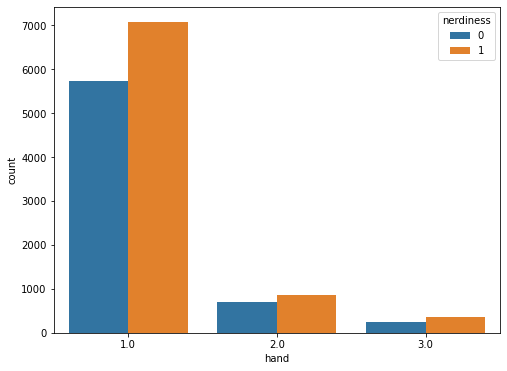

In [85]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='hand', hue = train['nerdiness'])

In [86]:
x_train.drop('hand', axis=1, inplace = True)
test.drop('hand', axis=1, inplace = True)


## religion

<AxesSubplot:xlabel='religion', ylabel='count'>

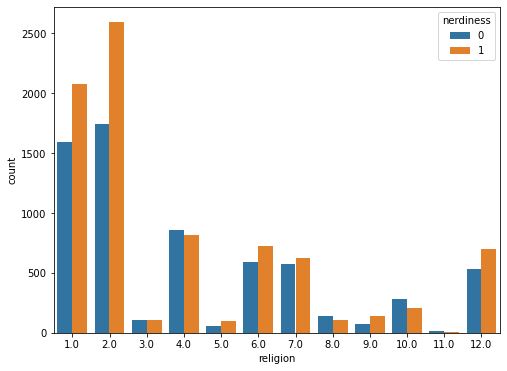

In [87]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='religion', hue = train['nerdiness'])

In [88]:
# 결측치 확인
x_train['religion'].isnull().sum()
test['religion'].isnull().sum()

483

In [89]:
#결측치 대체
x_train['religion'] = x_train['religion'].fillna(x_train['religion'].mean())
test['religion'] = test['religion'].fillna(test['religion'].mean())

In [90]:
# 결측치 확인
x_train['religion'].isnull().sum()

0

In [91]:
test['religion'].isnull().sum()

0

## orientation

<AxesSubplot:xlabel='orientation', ylabel='count'>

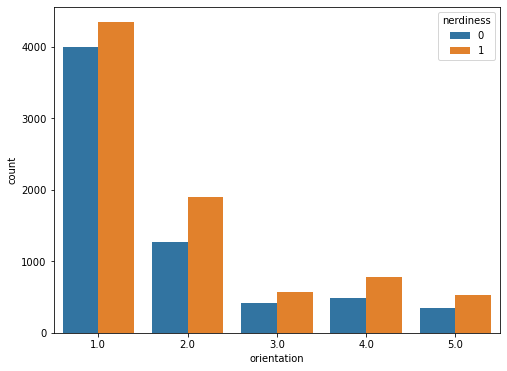

In [92]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='orientation', hue = train['nerdiness'])

이것도 일단 그냥 냅두기 결측치만 채워주기

In [93]:
# 결측치 확인
x_train['orientation'].isnull().sum()

399

In [94]:
#결측치 대체
x_train['orientation'] = x_train['orientation'].fillna(x_train['orientation'].mean())
test['orientation'] = test['orientation'].fillna(test['orientation'].mean())


In [95]:
# 결측치 확인
x_train['orientation'].isnull().sum()

0

In [96]:
x_train[x_train['gender'] == 1.0]['orientation'].value_counts()

1.000000    3786
2.000000     602
3.000000     362
4.000000     162
1.847956     143
5.000000     123
Name: orientation, dtype: int64

In [97]:
x_train[x_train['gender'] == 2.0]['orientation'].value_counts()

1.000000    4524
2.000000    2313
4.000000     894
5.000000     557
3.000000     535
1.847956     251
Name: orientation, dtype: int64

In [98]:
x_train[x_train['gender'] == 3.0]['orientation'].value_counts()

2.000000    242
4.000000    198
5.000000    192
3.000000     90
1.000000     21
1.847956      5
Name: orientation, dtype: int64

In [99]:
train[train['gender'] == 1.0]['nerdiness'].value_counts()

1    2823
0    2355
Name: nerdiness, dtype: int64

In [100]:
2823 / 2355

1.1987261146496815

In [101]:
train[train['gender'] == 2.0]['nerdiness'].value_counts()

1    4996
0    4078
Name: nerdiness, dtype: int64

In [102]:
4996 /4078

1.2251103482099068

In [103]:
train[train['gender'] == 3.0]['nerdiness'].value_counts()

1    476
0    253
Name: nerdiness, dtype: int64

In [104]:
476 / 253

1.8814229249011858

## voted

<AxesSubplot:xlabel='voted', ylabel='count'>

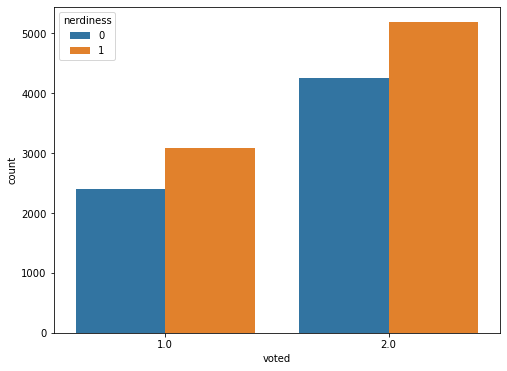

In [105]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='voted', hue = train['nerdiness'])

In [106]:
# 결측치 확인
x_train['voted'].isnull().sum()

85

In [107]:

x_train['voted'] = x_train['voted'].fillna(x_train['voted'].mean())
test['voted'] = test['voted'].fillna(test['voted'].mean())

In [108]:
# 결측치 확인
x_train['voted'].isnull().sum()

0

## married

<AxesSubplot:xlabel='married', ylabel='count'>

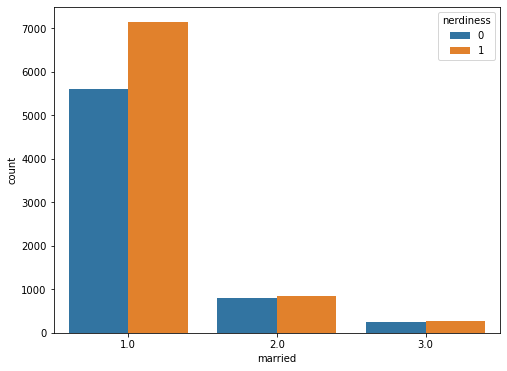

In [109]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='married', hue = train['nerdiness'])

In [110]:
train['married'].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [111]:
x_train[x_train['married'].isnull()]['orientation'].value_counts()

1.000000    35
2.000000    19
1.847956    18
5.000000     5
4.000000     4
3.000000     1
Name: orientation, dtype: int64

In [112]:
x_train[x_train['married'].isnull()]['gender'].value_counts()

2.0    53
1.0    27
3.0     2
Name: gender, dtype: int64

In [113]:
# 결측치 확인
x_train['married'].isnull().sum()

82

In [114]:

x_train['married'] = x_train['married'].fillna(x_train['married'].mean())
test['married'] = test['married'].fillna(test['married'].mean())

In [115]:
# 결측치 재확인
x_train['married'].isnull().sum()

0

## familysize

<AxesSubplot:xlabel='familysize', ylabel='count'>

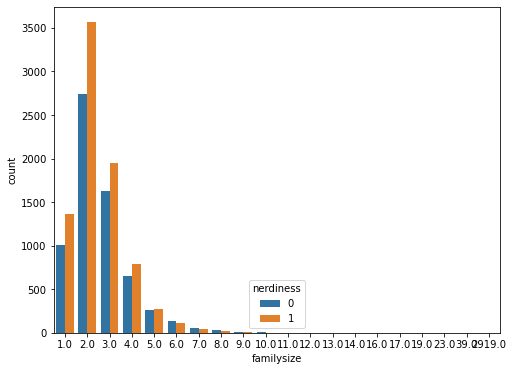

In [116]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='familysize', hue = train['nerdiness'])

<AxesSubplot:>

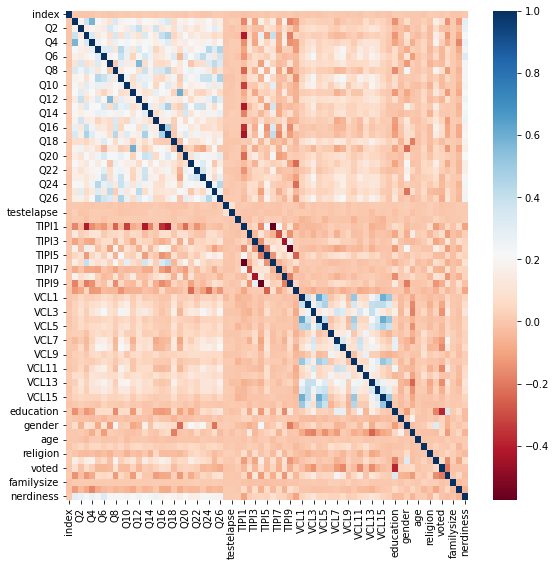

In [117]:
plt.figure(figsize=(9,9))
corr = train.corr()
sns.heatmap(corr, cmap='RdBu')

In [118]:
#이상치 제거
#x_train = x_train.drop(x_train[x_train.familysize > 50].index)
#test = test.drop(test[test.familysize > 50].index)

In [119]:
# 결측치 확인
x_train['familysize'].isnull().sum()

319

In [120]:
x_train['familysize'] = x_train['familysize'].fillna(x_train['familysize'].mean())
test['familysize'] = test['familysize'].fillna(test['familysize'].mean())

In [121]:
# 결측치 확인
x_train['familysize'].isnull().sum()

0

## ASD

<AxesSubplot:xlabel='ASD', ylabel='count'>

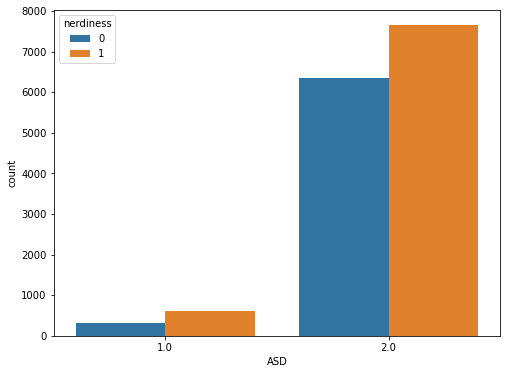

In [122]:
plt.figure(figsize = (8,6))
sns.countplot(data=train, x='ASD', hue = train['nerdiness'])

In [123]:
# 결측치 확인
x_train['ASD'].isnull().sum()

89

In [124]:

x_train['ASD'] = x_train['ASD'].fillna(x_train['ASD'].mean())
test['ASD'] = test['ASD'].fillna(test['ASD'].mean())

In [125]:
# 결측치 재확인
x_train['ASD'].isnull().sum()

0

In [126]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [127]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(x_train, y_train)


VotingClassifier(estimators=[('r1', RandomForestClassifier(n_estimators=500)),
                             ('r2', LGBMClassifier()),
                             ('r3', GradientBoostingClassifier())],
                 voting='soft')

In [128]:
model = soft_vote
pred_y = model.predict_proba(test)
pred_y = pred_y[:,1]


In [129]:
pred = soft_vote.predict(test)

In [130]:
submission = pd.DataFrame({
    "nerdiness" : pred_y
})
submission.to_csv('sub_0811_1.csv', index=True)